In [1]:
from ImageAlgoKD import *
from timeit import default_timer as timer

## 1. Generate Toy Data Points

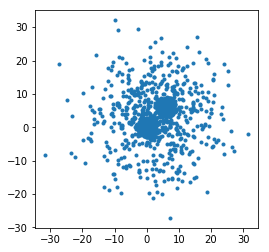

In [62]:
kPoints = 2
# make 1000 toy points
p1 = np.random.normal(array([0,0]),np.array([1,1]),size=(1500,kPoints))
p2 = np.random.normal(array([6,6]),np.array([1,1]),size=(2000,kPoints))
p3 = np.random.normal(array([2.5,2.5]),np.array([10,10]),size=(596,kPoints))
points = Points(np.r_[p1,p2,p3])
# plot toy points
plt.figure(figsize=(4,4),facecolor="w")
plt.plot( points.cords[:,0],points.cords[:,1], "." )
#plt.grid(linestyle="--",color="grey",lw=0.5)

## 2. Define Clustering Parameters and Run

In [63]:
# define clustering parameters
ia = ImageAlgoKD(MAXDISTANCE        = 10,
                 KERNEL_R           = 1.0,
                 KERNEL_R_NORM      = 1.0,
                 KERNEL_R_POWER     = 0.0,
                 DECISION_RHO_KAPPA = 5.0,
                 DECISION_NHD       = 2.0,
                 CONTINUITY_NHD     = 1.0)
ia.setInputsPoints(points)

In [76]:
# run the clustering
start = timer()
ia.run("opencl",1,32)
end = timer()

print("Total time {:7.4f} ms".format( (end-start)*1000)  )

clustering finished!
Total time 159.5947 ms


## 3. Plot Clustering Result

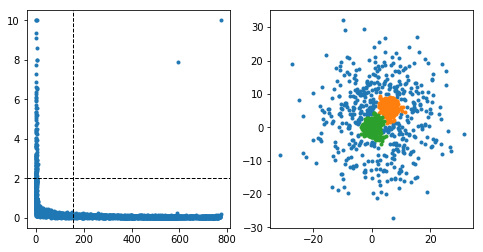

In [73]:
plt.figure(figsize=(8,4),facecolor="w")

plt.subplot(1,2,1)
plt.plot(ia.points.rho,ia.points.nhd, ".")
plt.axvline(ia.DECISION_RHO,color='k',linestyle="--",linewidth=1)
plt.axhline(ia.DECISION_NHD,color='k',linestyle="--",linewidth=1)

plt.subplot(1,2,2)
for icluster in np.unique(ia.points.clusterID):
    slt = ia.points.clusterID==icluster
    x,y = ia.points.cords[slt,0],ia.points.cords[slt,1]
    plt.plot( x, y,".")

In [74]:
openclInfo()

PyOpenCL version: 2018.1.1
- Installed platforms (SDKs) and available devices:
Available devices: 

	Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz (Intel)
	Version:                 OpenCL 1.2 
	Type:                    CPU       
	Max work group size:     1024      
	Max compute units:       4         

	Intel(R) Iris(TM) Plus Graphics 640 (Intel Inc.)
	Version:                 OpenCL 1.2 
	Type:                    GPU       
	Max work group size:     256       
	Max compute units:       48        
